In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
randData = 2*np.random.rand(400,2)-1 # génération des nuyage des points aléatoire entre -1 et 1, 
      

In [27]:
randData.shape #visualiser la taille 

(400, 2)

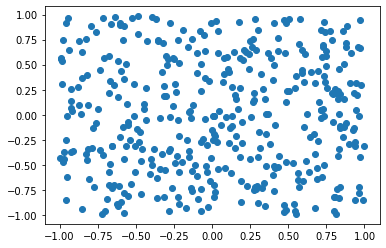

In [28]:
plt.scatter(randData[:,0],randData[:,1]) #visualiser les donneés

In [29]:
labels = np.zeros((randData.shape[0],1),dtype=np.byte) # allocations mémoire des vrais classes , au début, tout les donneés sont de class 0

In [30]:
# true classes
labels = randData[:,0] > 0  # les point dont le x > 0 ont la valeur 1, si nn ils ont la valeur 0

In [31]:
class0 = randData[np.where(labels == False)] # extraction des donnés dont le label = 0 (class 0)

In [32]:
class1 = randData[np.where(labels == True)] # extraction des donnés dont le label = 1  (class 1)

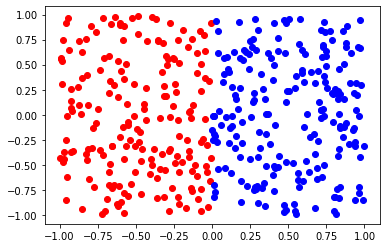

In [33]:
plt.scatter(class0[:,0],class0[:,1],color = 'red') #class 0 en rouge
plt.scatter(class1[:,0],class1[:,1],color = 'blue')#class 1 en bleu

In [34]:

def predict(w,b,x_y): #la sortie de perceptron
# y = w.x + b
  x = x_y.reshape(x_y.shape[0],1)
  y=  np.dot(w.T,x) +b
  #print(y)
  if(y>0):
    return 1
  return 0

In [35]:
randData = np.array(randData)
nbr_iterations = 15 #nombre d'iterations
iteration =0 #compteur
log = []#une liste pour sauvgarder les erreurs dans chaque iteration
w=np.random.rand(2,1)# les parametres
b =np.random.rand(1,1)# le bias
taux = 0.01 # taux d'apprnstissage
error=0#initialiser l'erreur

while(iteration < nbr_iterations):
  
  for x_y , label in zip(randData,labels):
    x_y = np.asarray(x_y).reshape(len(x_y),1)#pour avoir un structure de numpy
    h = predict(w,b,x_y) #calculer la sortie
    diff = abs(label - h)
    error = error + diff#mise a jour l'erreur
    if(error !=0): #mise a jour les parameters en cas de miss-prediction
      w = w + taux*(label - h)*x_y 
      b = b + taux*(label - h)
  #fin de boucle fore ------------------------    
  error = error/randData.shape[0]
  print("iteration :",iteration," erreur : ",error)
  log.append(error)
  if(error==0):
    break
  error = 0
  iteration+=1
  
    


iteration : 0  erreur :  0.13
iteration : 1  erreur :  0.035
iteration : 2  erreur :  0.02
iteration : 3  erreur :  0.0125
iteration : 4  erreur :  0.0025
iteration : 5  erreur :  0.005
iteration : 6  erreur :  0.005
iteration : 7  erreur :  0.0


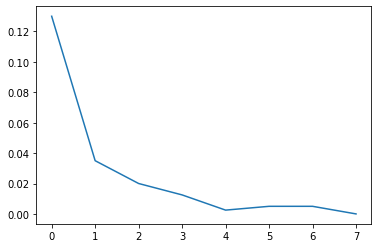

In [36]:
plt.plot(log)

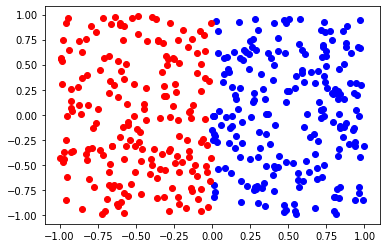

In [37]:
#tracer le donnés classifié, dans ce cas, la couleur est choisi en rapport de la sortie de precpteron

  
for row in randData:
  result = predict(w,b,row)
  if(result == 0):
    plt.scatter(row[0],row[1],color ='red',cmap='Paired')
  else:
    plt.scatter(row[0],row[1],color = 'blue',cmap='Paired')


on voit que le perceptron a bien classifié les donneés


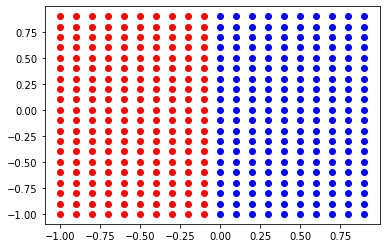

In [38]:
#test sur des donnés non utilisé dans l'apprentissage

# faire pas de 0.1 sur  et y apres calculer la sorite et la tracer dans la figure
for i in np.arange(-1,1,0.1):
  for j in np.arange(-1,1,0.1):
    result = predict(w,b, np.asarray([i,j]) )
    if(result == 0):
      plt.scatter(i,j,color ='red')
    else:
      plt.scatter(i,j,color = 'blue')

